# Time Series Forcasting using ARIMA and SARIMA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('portland.csv')
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [3]:
df.columns = ['Month', 'Average Monthly Bus Ride']

In [4]:
df.shape

(115, 2)

In [5]:
df.isnull().sum()

Month                       0
Average Monthly Bus Ride    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Month                     115 non-null    object
 1   Average Monthly Bus Ride  115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [7]:
df['Month'] = pd.to_datetime(df['Month'], errors='coerce', format='%Y-%m')

In [8]:
df

,Month,Average Monthly Bus Ride
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630
...,...,...
110,1969-03-01,1419
111,1969-04-01,1432
112,1969-05-01,1394
113,1969-06-01,1327


In [9]:
df.isnull().sum()

Month                       1
Average Monthly Bus Ride    0
dtype: int64

In [10]:
df.dropna(subset = ['Month'], inplace=True)

In [11]:
df.isnull().sum()

Month                       0
Average Monthly Bus Ride    0
dtype: int64

In [12]:
df.set_index('Month', inplace=True)

In [13]:
df.dtypes

Average Monthly Bus Ride    object
dtype: object

In [14]:
df['Average Monthly Bus Ride'] = df['Average Monthly Bus Ride'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1960-01-01 to 1969-06-01
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Average Monthly Bus Ride  114 non-null    int32
dtypes: int32(1)
memory usage: 1.3 KB


<AxesSubplot:xlabel='Month'>

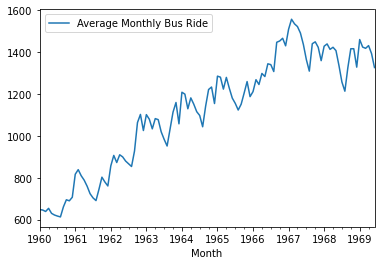

In [16]:
df.plot()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
x = df['Average Monthly Bus Ride']
result=adfuller(x)
print('ADF Statistics ',result[0])
print('p-value ',result[1])
print('Critical values ',result[5])

if result[1]<=0.05:
    print("Fail to reject null hypotheisis h1, it means data is stationary")
else:
    print("Reject the null hypotheisis, it means data is not stationary")

ADF Statistics  -1.5365971444531585
p-value  0.5153358797821741
Critical values  1028.4238367341432
Reject the null hypotheisis, it means data is not stationary


In [20]:
df['Average Monthly Bus Ride'].shift(1)

Month
1960-01-01       NaN
1960-02-01     648.0
1960-03-01     646.0
1960-04-01     639.0
1960-05-01     654.0
               ...  
1969-02-01    1461.0
1969-03-01    1425.0
1969-04-01    1419.0
1969-05-01    1432.0
1969-06-01    1394.0
Name: Average Monthly Bus Ride, Length: 114, dtype: float64

In [23]:
df['avg monthly busride first difference'] = df['Average Monthly Bus Ride'] - df['Average Monthly Bus Ride'].shift(1)

In [22]:
df.head()

,Average Monthly Bus Ride,avg monthly busride first difference
Month,,
1960-01-01,648,NaN
1960-02-01,646,-2.0
1960-03-01,639,-7.0
1960-04-01,654,15.0
1960-05-01,630,-24.0


In [24]:
x=df['avg monthly busride first difference'].dropna() 
result=adfuller(x)

print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -1.9386960651548353
p-value 0.31408183706085435
critical values 1019.5692927050793
Reject the null hypotheise , it mean data is not stationary


<AxesSubplot:xlabel='Month'>

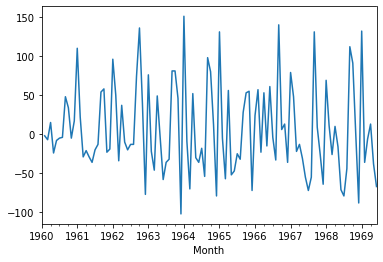

In [26]:
df['avg monthly busride first difference'].plot()

In [28]:
df['avg monthly busride second difference'] = df['Average Monthly Bus Ride'] - df['Average Monthly Bus Ride'].shift(12)

In [29]:
df.head(10)

,Average Monthly Bus Ride,avg monthly busride first difference,avg monthly busride second difference
Month,,,
1960-01-01,648,NaN,NaN
1960-02-01,646,-2.0,NaN
1960-03-01,639,-7.0,NaN
1960-04-01,654,15.0,NaN
1960-05-01,630,-24.0,NaN
1960-06-01,622,-8.0,NaN
1960-07-01,617,-5.0,NaN
1960-08-01,613,-4.0,NaN
1960-09-01,661,48.0,NaN


In [30]:
x=df['avg monthly busride second difference'].dropna() # learn about result's returns values..
result=adfuller(x)
#result[0]
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.5:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -2.469740563531969
p-value 0.12301141534048127
critical values 901.5419314445508
fail to reject null hypothese h1 , it mean data is stationary


<AxesSubplot:xlabel='Month'>

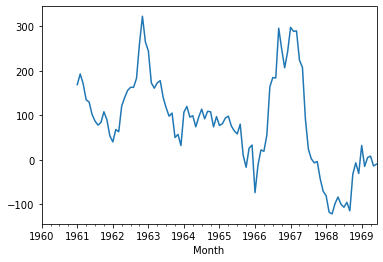

In [32]:
df['avg monthly busride second difference'].plot()

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

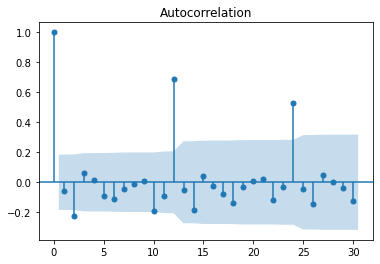

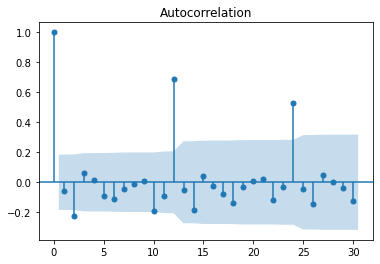

In [35]:
plot_acf(df['avg monthly busride first difference'].iloc[1:],lags=30)

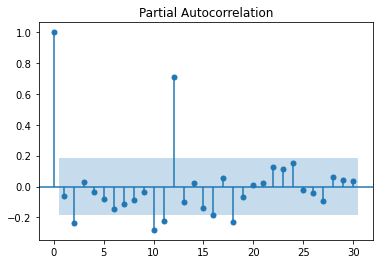

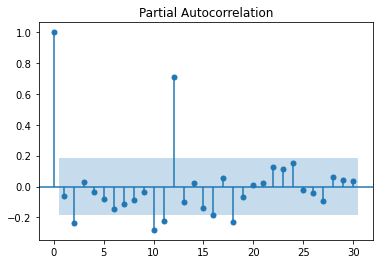

In [36]:
plot_pacf(df['avg monthly busride first difference'].iloc[1:],lags=30)

### Its ARMA model

In [38]:
from statsmodels.tsa.arima_model import ARMA

In [39]:
model=ARMA(df['Average Monthly Bus Ride'],order=(2,2))
model_fit=model.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [40]:
model_fit.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARMA Model Results                                 
====================================================================================
Dep. Variable:     Average Monthly Bus Ride   No. Observations:                  114
Model:                           ARMA(2, 2)   Log Likelihood                -625.388
Method:                             css-mle   S.D. of innovations             56.848
Date:                      Fri, 02 Jul 2021   AIC                           1262.776
Time:                              19:39:19   BIC                           1279.193
Sample:                          01-01-1960   HQIC                          1269.439
                               - 06-01-1969                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1686.6935        nan        nan        nan         nan         nan
ar.L1.Average Monthly Bus Ride     1.9967      0.002   1200.092      0.000       1.993       2.000
ar.L2.Average Monthly Bus Ride    -0.9968      0.002   -555.863      0.000      -1.000      -0.993
ma.L1.Average Monthly Bus Ride    -1.0683      0.123     -8.654      0.000      -1.310      -0.826
ma.L2.Average Monthly Bus Ride     0.0683      0.124      0.549      0.583      -0.175       0.312
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           -0.0107j            1.0016           -0.0017
AR.2            1.0015           +0.0107j            1.0016            0.0017
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           14.6514           +0.0000j           14.6514            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

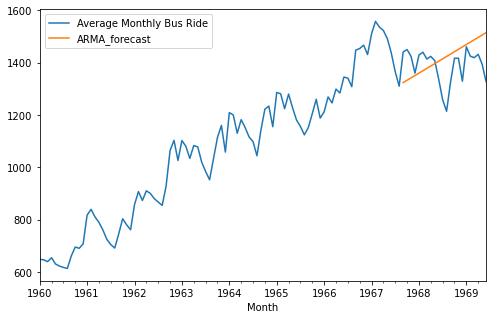

In [42]:
df['ARMA_forecast'] = model_fit.predict(start = 92, end= 114, dynamic= True)  
df[['Average Monthly Bus Ride', 'ARMA_forecast']].plot(figsize=(8, 5)) 


### Its ARIMA model

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
model1=ARIMA(df['Average Monthly Bus Ride'],order=(2,1,2))
model_fit1=model1.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [46]:
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D.Average Monthly Bus Ride   No. Observations:                  113
Model:                         ARIMA(2, 1, 2)   Log Likelihood                -611.903
Method:                               css-mle   S.D. of innovations             54.314
Date:                        Fri, 02 Jul 2021   AIC                           1235.807
Time:                                19:42:24   BIC                           1252.171
Sample:                            02-01-1960   HQIC                          1242.447
                                 - 06-01-1969                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                6.7323      2.247      2.996      0.003       2.328      11.137
ar.L1.D.Average Monthly Bus Ride     0.1449      0.274      0.530      0.596      -0.391       0.681
ar.L2.D.Average Monthly Bus Ride     0.2776      0.238      1.167      0.243      -0.188       0.744
ma.L1.D.Average Monthly Bus Ride    -0.2315      0.244     -0.949      0.343      -0.710       0.247
ma.L2.D.Average Monthly Bus Ride    -0.5258      0.223     -2.355      0.019      -0.963      -0.088
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6548           +0.0000j            1.6548            0.0000
AR.2           -2.1768           +0.0000j            2.1768            0.5000
MA.1            1.1764           +0.0000j            1.1764            0.0000
MA.2           -1.6167           +0.0000j            1.6167            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

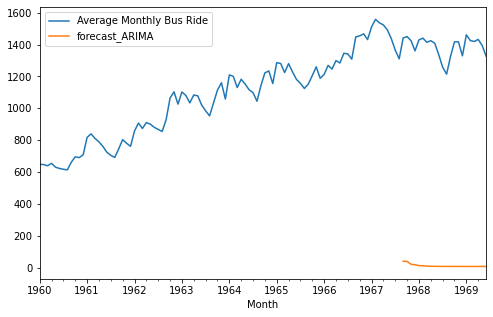

In [48]:
df['forecast_ARIMA'] = model_fit1.predict(start = 92, end= 114, dynamic= True)  
df[['Average Monthly Bus Ride', 'forecast_ARIMA']].plot(figsize=(8, 5)) 


### Its s+ARIMA

In [50]:
import statsmodels.api as sm  

model=sm.tsa.statespace.SARIMAX(df['Average Monthly Bus Ride'],order=(2,1,2),seasonal_order=(2,1,2,6))
result=model.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood o

<AxesSubplot:xlabel='Month'>

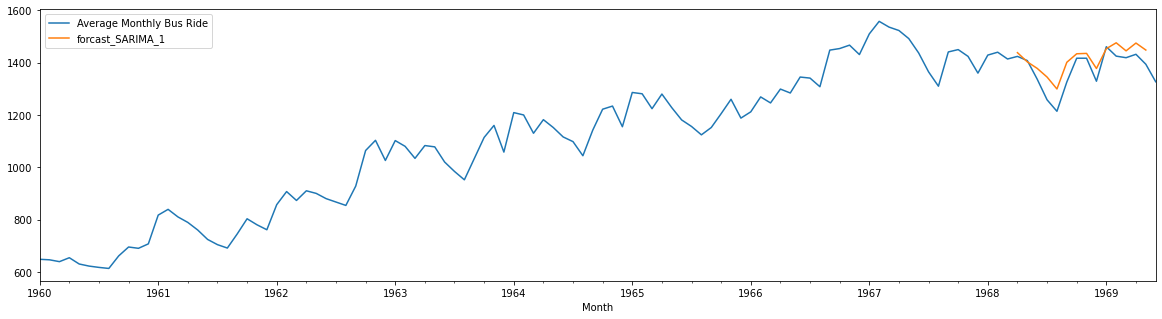

In [52]:
df['forcast_SARIMA_1']=result.predict(start=99, end=112, dynamic=True)
df[['Average Monthly Bus Ride','forcast_SARIMA_1']].plot(figsize=(20, 5)) 

### future prediction using SARIMA model

In [55]:
import datetime
from dateutil.relativedelta import relativedelta


start = datetime.datetime.strptime("1969-07-01", "%Y-%m-%d")

date_list = [start + relativedelta(months=x) for x in range(0,12)]
future_prediction = pd.DataFrame(index=date_list, columns= df.columns)
df = pd.concat([df, future_prediction])


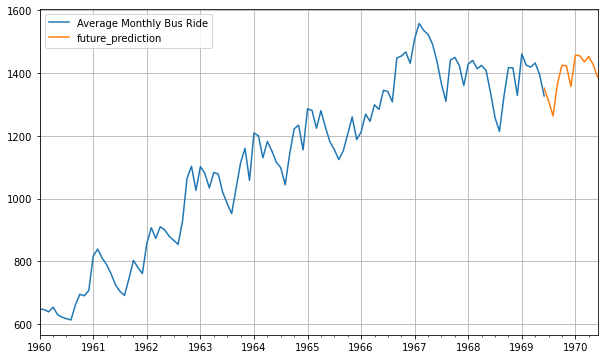

In [56]:
df['future_prediction']=result.predict(start=113, end=130, dynamic=True)
df[['Average Monthly Bus Ride','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)


<AxesSubplot:>

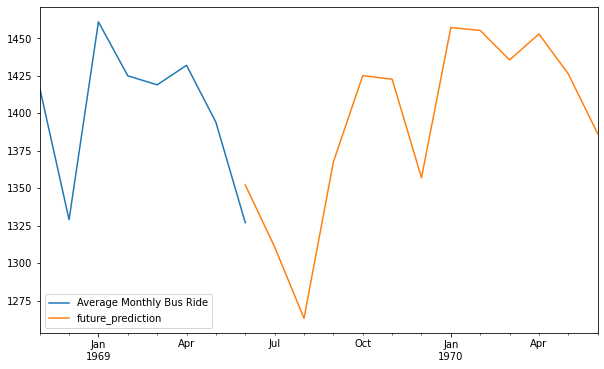

In [58]:
df['future_prediction'] = result.predict(start = 113, end=130, dynamic= True)  
df[['Average Monthly Bus Ride', 'future_prediction']].iloc[-20:].plot(figsize=(10, 6)) 
